## Mysql-Python Connection

In [1]:
import mysql.connector
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline

In [2]:
db_connection = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="Atayarkin2003!"
)
print(db_connection)

### Create Database

In [3]:
# creating database_cursor to perform SQL operation
db_cursor = db_connection.cursor(buffered=True)

In [4]:
# executing cursor with execute method and pass SQL query
db_cursor.execute("CREATE DATABASE ps_ecommerce")

# get list of all databases
db_cursor.execute("SHOW DATABASES")

# print all databases
for db in db_cursor:
    print(db)

DatabaseError: 1007 (HY000): Can't create database 'ps_ecommerce'; database exists

In [5]:
db_cursor.execute("USE ps_ecommerce")

### Load Data to Mysql Tables

In [6]:
def populate_table(db_connection, db_cursor, insert_query, file_path):
    
    with open(file_path, mode='r') as csv_data:
        reader = csv.reader(csv_data, delimiter=';')
        csv_data_list = list(reader)
        for row in csv_data_list[1:]:
            row = tuple(map(lambda x: None if x == "" else x, row[0].split(',')))
            db_cursor.execute(insert_query, row)
        
    db_connection.commit()

In [7]:
db_cursor.execute("""CREATE TABLE CUSTOMERS (customer_id VARCHAR(50) NOT NULL, 
                                          customer_unique_id VARCHAR(50) NOT NULL, 
                                          customer_zip_code_prefix VARCHAR(50), 
                                          customer_city VARCHAR(50), 
                                          customer_state VARCHAR(50))""")

insert_customers = (
    "INSERT INTO CUSTOMERS(customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state) "
    "VALUES (%s, %s, %s, %s, %s)"
)

populate_table(db_connection, db_cursor, insert_customers, "data/customers.csv")

ProgrammingError: 1050 (42S01): Table 'customers' already exists

In [8]:
db_cursor.execute("""CREATE TABLE ORDER_PAYMENTS (order_id VARCHAR(50) NOT NULL, 
                                          payment_sequential INTEGER, 
                                          payment_type VARCHAR(50), 
                                          payment_installments INTEGER, 
                                          payment_value FLOAT)""")

insert_orderpayments = (
    "INSERT INTO ORDER_PAYMENTS(order_id, payment_sequential, payment_type, payment_installments, payment_value) "
    "VALUES (%s, %s, %s, %s, %s)"
)

populate_table(db_connection, db_cursor, insert_orderpayments, "data/order_payments.csv")

ProgrammingError: 1050 (42S01): Table 'order_payments' already exists

In [9]:
db_cursor.execute("""CREATE TABLE ORDER_ITEMS (order_id VARCHAR(50) NOT NULL, 
                                          order_item_id INTEGER, 
                                          product_id VARCHAR(50), 
                                          seller_id VARCHAR(50), 
                                          shipping_limit_date DATETIME,
                                          price FLOAT,
                                          freight_value FLOAT)""")

insert_orderitems = (
    "INSERT INTO ORDER_ITEMS(order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value) "
    "VALUES (%s, %s, %s, %s, %s, %s, %s)"
)

populate_table(db_connection, db_cursor, insert_orderitems, "data/order_items.csv")

ProgrammingError: 1050 (42S01): Table 'order_items' already exists

In [10]:
db_cursor.execute("""CREATE TABLE PRODUCTS (product_id VARCHAR(50) NOT NULL, 
                                            product_category_name VARCHAR(50),
                                            product_name_lenght FLOAT,
                                            product_description_lenght FLOAT,
                                            product_photos_qty FLOAT,
                                            product_weight_g FLOAT,
                                            product_length_cm FLOAT,
                                            product_height_cm FLOAT,
                                            product_width_cm FLOAT)
                                            
                                          """)

insert_products = (
    "INSERT INTO PRODUCTS(product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm) "
    "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s) "
)

populate_table(db_connection, db_cursor, insert_products, "data/products.csv")

ProgrammingError: 1050 (42S01): Table 'products' already exists

In [11]:
db_cursor.execute("""CREATE TABLE ORDERS (order_id VARCHAR(50) NOT NULL, 
                                          customer_id VARCHAR(50) NOT NULL, 
                                          order_status VARCHAR(50), 
                                          order_purchase_timestamp DATETIME, 
                                          order_approved_at DATETIME,
                                          order_delivered_carrier_date DATETIME,
                                          order_delivered_customer_date DATETIME,
                                          order_estimated_delivery_date DATETIME)""")

insert_orders = (
    "INSERT INTO ORDERS(order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) "
    "VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
)

populate_table(db_connection, db_cursor, insert_orders, "data/orders.csv")

ProgrammingError: 1050 (42S01): Table 'orders' already exists

### 1. Data Analysis on E-Commerce Database

#### Customers by cities

In [12]:
db_cursor.execute("""SELECT COUNT(customer_id), customer_city 
                                            FROM CUSTOMERS 
                                            GROUP BY customer_city
                                            ORDER BY COUNT(customer_id) DESC""")
customers_by_city = db_cursor.fetchall()

In [13]:
print(customers_by_city[:10])

[(15540, 'sao paulo'), (6882, 'rio de janeiro'), (2773, 'belo horizonte'), (2131, 'brasilia'), (1521, 'curitiba'), (1444, 'campinas'), (1379, 'porto alegre'), (1245, 'salvador'), (1189, 'guarulhos'), (938, 'sao bernardo do campo')]


In [14]:
top10_cities = customers_by_city[:10]
count, city = map(list, zip(*top10_cities))

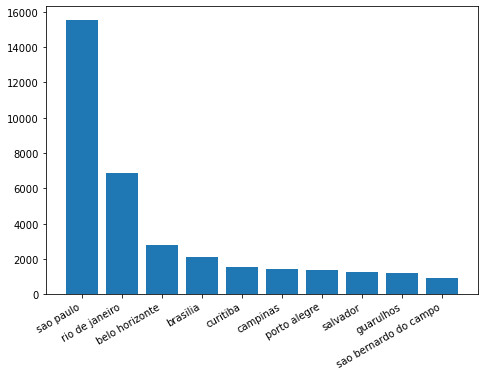

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(city, count)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

#### Average payment value by payment type

In [16]:
db_cursor.execute("""SELECT AVG(payment_value), payment_type 
                                            FROM ORDER_PAYMENTS 
                                            WHERE payment_value > 0
                                            GROUP BY payment_type
                                            ORDER BY AVG(payment_value) DESC""")
value_by_type = db_cursor.fetchall()

In [17]:
value, t = map(list, zip(*value_by_type))
print(value, t)


[163.31902064167554, 145.03443537677197, 142.57017003764818, 65.77168840279909] ['credit_card', 'boleto', 'debit_card', 'voucher']


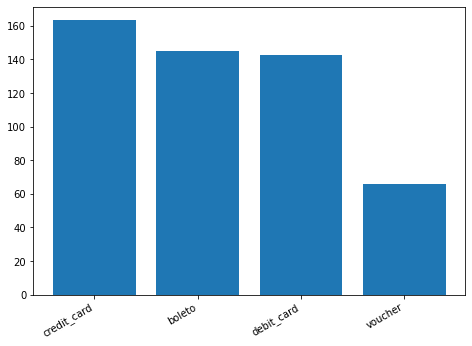

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(t, value)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

#### Top 10 spenders


In [19]:
db_cursor.execute("""SELECT ORDERS.customer_id, SUM(ORDER_COSTS.cost) AS spent 
                        FROM
                        ORDERS JOIN
                        (SELECT order_id , SUM(price) AS cost
                                FROM ORDER_ITEMS  
                                GROUP BY order_id
                        ) ORDER_COSTS
                        ON ORDERS.order_id=ORDER_COSTS.order_id
                        GROUP BY ORDERS.customer_id
                        ORDER BY spent DESC
                                """)
top_spenders = db_cursor.fetchall()

In [20]:
spent, cid = map(list, zip(*top_spenders[:10]))
print(spent, cid)

['"1617b1357756262bfa56ab541c47bc16"', 'ec5b2ba62e574342386871631fafd3fc', 'c6e2731c5b391845f6800c97401a43a9', 'f48d464a0baaea338cb25f816991ab1f', '"3fd6777bbce08a352fddd04e4a7cc8f6"', '"05455dfa7cd02f13d132aa7a6a9729c6"', 'df55c14d1476a9a3467f131269c2477f', '"24bbf5fd2f2e1b359ee7de94defc4a15"', 'e0a2412720e9ea4f26c1ac985f6a7358', '"3d979689f636322c62418b6346b1c6d2"'] [13440.0, 7160.0, 6735.0, 6729.0, 6499.0, 5934.599853515625, 4799.0, 4690.0, 4599.89990234375, 4590.0]


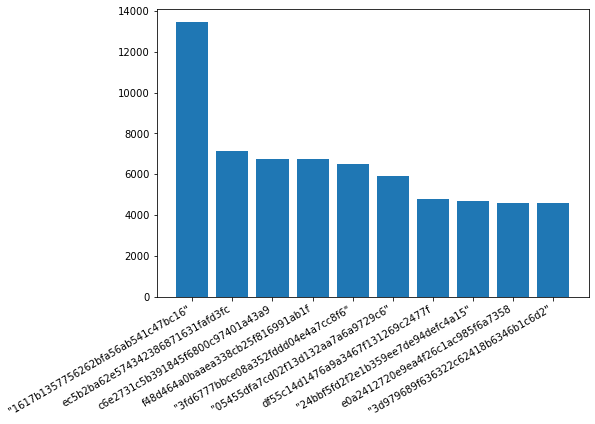

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(spent, cid)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

## User-Based Collaborative Filtering

In [22]:
quantity_query = """
                    CREATE TABLE QUANTITY AS (
                        SELECT
                            order_id, product_id, COUNT(*) as qty
                        FROM ORDER_ITEMS
                        GROUP BY order_id, product_id)
                 """
db_cursor.execute(quantity_query)

ProgrammingError: 1050 (42S01): Table 'QUANTITY' already exists

In [23]:
purchase_query = """
                    CREATE TABLE PURCHASE AS (
                        SELECT 
                            CUSTOMERS.customer_id as cid, 
                            QUANTITY.product_id as pid,
                            QUANTITY.qty
                        FROM 
                            ORDERS JOIN CUSTOMERS 
                                ON ORDERS.customer_id=CUSTOMERS.customer_id 
                            JOIN QUANTITY 
                                ON ORDERS.order_id=QUANTITY.order_id)
                """

db_cursor.execute(purchase_query)

ProgrammingError: 1050 (42S01): Table 'PURCHASE' already exists

In [24]:
user_based_query = """
                          SELECT P1.cid AS user_1,
                               P2.cid AS user_2,
                               SUM(P1.qty * P2.qty) AS similarity

                            FROM PURCHASE P1
                            JOIN PURCHASE P2
                                ON P1.pid=P2.pid
                            WHERE P1.cid<>P2.cid

                            GROUP BY user_1, user_2
                            ORDER BY similarity DESC
                """

db_cursor.execute(user_based_query)
user_based = db_cursor.fetchall()

In [25]:
user_based[:3]

[('d5f2b3f597c7ccafbb5cac0bcc3d6024',
  'fefe47950f42fddc66afdf7315a36dae',
  Decimal('84')),
 ('d5f2b3f597c7ccafbb5cac0bcc3d6024',
  'c799766de6042338158b08fc7418df09',
  Decimal('84')),
 ('fefe47950f42fddc66afdf7315a36dae',
  'd5f2b3f597c7ccafbb5cac0bcc3d6024',
  Decimal('84'))]

In [26]:
def get_purchased_items(cid):
    query = "SELECT pid, qty from PURCHASE where cid='" + cid + "'"
    db_cursor.execute(query)
    items = db_cursor.fetchall()
    return items

In [27]:
print(get_purchased_items("d5f2b3f597c7ccafbb5cac0bcc3d6024"))
print(get_purchased_items("fefe47950f42fddc66afdf7315a36dae"))


[('"422879e10f46682990de24d770e7f83d"', 14)]
[('"422879e10f46682990de24d770e7f83d"', 6)]


In [28]:
#Q1)
db_cursor.execute("""SELECT AVG(TIMESTAMPDIFF(DAY,order_purchase_timestamp,order_delivered_customer_date)) AS Average
FROM ps_ecommerce.ORDERS;

                                """)
averageDelvTime = db_cursor.fetchall()
print(averageDelvTime)

[(Decimal('12.0941'),)]


[('SP', 15588), ('RJ', 4807), ('MG', 4488), ('RS', 2063), ('PR', 1843), ('SC', 1371), ('BA', 1261), ('GO', 807), ('DF', 802), ('ES', 751), ('PE', 655), ('CE', 492), ('PA', 338), ('MT', 337), ('MA', 264), ('MS', 246), ('PB', 211), ('PI', 184), ('RN', 167), ('AL', 162), ('SE', 116), ('TO', 106), ('RO', 105), ('AM', 48), ('AC', 25), ('AP', 22), ('RR', 17)]


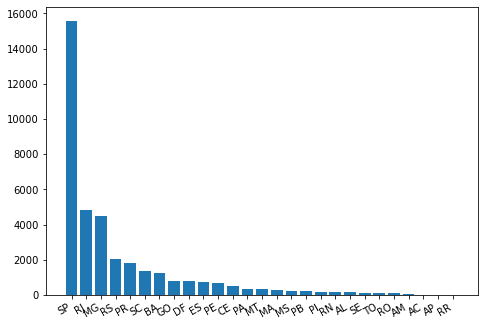

In [29]:
#Q2
db_cursor.execute("""SELECT C.customer_state,COUNT(*) AS count
FROM ps_ecommerce.ORDERS AS O, ps_ecommerce.CUSTOMERS AS C
WHERE O.customer_id = C.customer_id
GROUP BY customer_state
ORDER BY count DESC; """)
countforEachState = db_cursor.fetchall()
print(countforEachState)

state, countt = map(list, zip(*countforEachState[:]))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(state, countt)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()






[(1, 11960), (2, 16196), (3, 15963), (4, 15552), (5, 14761), (6, 14122), (7, 10887)]


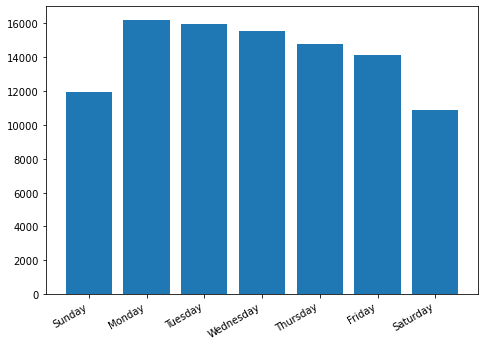

In [30]:
#Q3)
db_cursor.execute("""SELECT  DAYOFWEEK(order_purchase_timestamp) AS days,COUNT(*) AS count
FROM ps_ecommerce.ORDERS AS O
GROUP BY DAYOFWEEK(order_purchase_timestamp)
ORDER BY days ASC; """)
daysOfWeek = db_cursor.fetchall()
print(daysOfWeek)

days, amount = map(list, zip(*daysOfWeek[:]))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], amount)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()





In [31]:
#Q4)
db_cursor.execute("""SELECT PRODUCTS.product_category_name AS Category, AVG(payment_value) AS Average, MAX(payment_value) AS max, MIN(payment_value) AS min
FROM ORDER_PAYMENTS NATURAL join PRODUCTS natural join ORDER_ITEMS
WHERE payment_type = 'credit_card' 
GROUP BY product_category_name
HAVING count(*) > 0;
 """)

son = db_cursor.fetchall()
print(son)




[('esporte_lazer', 171.64131082715977, 3826.8, 0.09), ('cama_mesa_banho', 156.01225523604552, 1861.26, 0.1), ('automotivo', 204.26545900085574, 2480.58, 0.22), ('brinquedos', 137.46042943743566, 1504.61, 0.16), ('relogios_presentes', 253.673156520013, 2734.66, 0.27), ('malas_acessorios', 187.80000068284758, 1328.08, 0.39), ('perfumaria', 167.77084282303824, 776.5, 0.28), ('moveis_decoracao', 161.7163188374752, 1859.1, 0.28), ('informatica_acessorios', 195.73441416012537, 3009.53, 0.05), ('bebes', 157.26922179547017, 2384.5, 3.68), ('papelaria', 122.7042915769104, 1221.28, 1.26), ('utilidades_domesticas', 138.04726664065782, 1861.26, 0.01), ('cool_stuff', 198.3559832249889, 2627.09, 2.34), ('beleza_saude', 188.85532844517311, 2828.42, 0.67), ('climatizacao', 373.73065217633115, 1642.54, 27.4), ('construcao_ferramentas_ferramentas', 227.5137905252391, 1930.34, 30.73), ('construcao_ferramentas_jardim', 208.90194816059537, 1768.4, 9.11), ('pcs', 1179.4122923404798, 2732.06, 67.83), ('pet_s

In [33]:
#Q5)
monthly_query = """ CREATE TABLE MONTHLY AS(
                    SELECT order_id as id, MONTH(order_purchase_timestamp) as month
FROM ORDERS
ORDER BY MONTH(order_purchase_timestamp) ASC);
                """

db_cursor.execute(monthly_query)

In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '1'
GROUP BY product_id;
 """)

ay1 = db_cursor.fetchall()
print(ay1)




In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '2'
GROUP BY product_id;
 """)

ay2 = db_cursor.fetchall()
print(ay2)

In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '3'
GROUP BY product_id;
 """)

ay3 = db_cursor.fetchall()
print(ay3)

In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '4'
GROUP BY product_id;
 """)

ay4 = db_cursor.fetchall()
print(ay4)

In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '5'
GROUP BY product_id;
 """)

ay5 = db_cursor.fetchall()
print(ay5)

In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '6'
GROUP BY product_id;
 """)

ay6 = db_cursor.fetchall()
print(ay6)

In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '7'
GROUP BY product_id;
 """)

ay7 = db_cursor.fetchall()
print(ay7)

In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '8'
GROUP BY product_id;
 """)

ay8 = db_cursor.fetchall()
print(ay8)

In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '9'
GROUP BY product_id;
 """)

ay9 = db_cursor.fetchall()
print(ay9)

In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '10'
GROUP BY product_id;
 """)

ay10 = db_cursor.fetchall()
print(ay10)

In [ ]:
db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '11'
GROUP BY product_id;
 """)

ay11 = db_cursor.fetchall()
print(ay11)

In [ ]:

db_cursor.execute("""
SELECT product_id as id, SUM(qty) AS TotalQuantity 
FROM ps_ecommerce.MONTHLY natural join quantity
WHERE month = '12'
GROUP BY product_id;
 """)

ay12 = db_cursor.fetchall()
print(ay12)

In [74]:
db_cursor.close()
db_connection.close()